## ECE495 In-class Exercise 1: Deep Neural Networks

In this demonstration we will:

1. Represent a sinusoidal input with a single neuron using Nengo
2. Tweak parameters to see if we can better represent our input using one neuron
3. Understand how Nengo represents data using spikes and decode the data manually
4. Represent a sinusoidal input with ten neurons using Nengo
5. Tweak parameters to determine how many neurons are needed and with what parameters to best represent our input signal

#### Set up

**Ensure you are using your [495 Virtual Environment](https://github.com/kaitlin-fair/495venv_setup) before you begin!**  
    
Import Nengo and other supporting libraries into your program to get started:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nengo
from nengo.dists import Uniform
from nengo.processes import WhiteSignal
from nengo.utils.ensemble import tuning_curves
from nengo.utils.ipython import hide_input
from nengo.utils.matplotlib import rasterplot


def aligned(n_neurons, radius=0.9):
    intercepts = np.linspace(-radius, radius, n_neurons)
    encoders = np.tile([[1], [-1]], (n_neurons // 2, 1))
    intercepts *= encoders[:, 0]
    return intercepts, encoders

## Create a Nengo Model to represent (i.e. Encode) Input Data

To do anything with data in Nengo, we must first convert the input data into spiking data using Nengo neuron ensembles. This is biologically inspired: neural populations represent time-varying signals through their spiking responses.

We start with a Nengo node (or nodes) that provide the input to a neuron (or neurons) in our Nengo model - this is essentially just a way to pass data from regular Python into a Nengo model filled with neurons. The input node(s) will then be connected to Nengo neuron(s) that convert the data to spikes (i.e. encode the data).

To understand how Nengo neurons encode inputs, let's look at a single neuron encoding a constant value:

Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


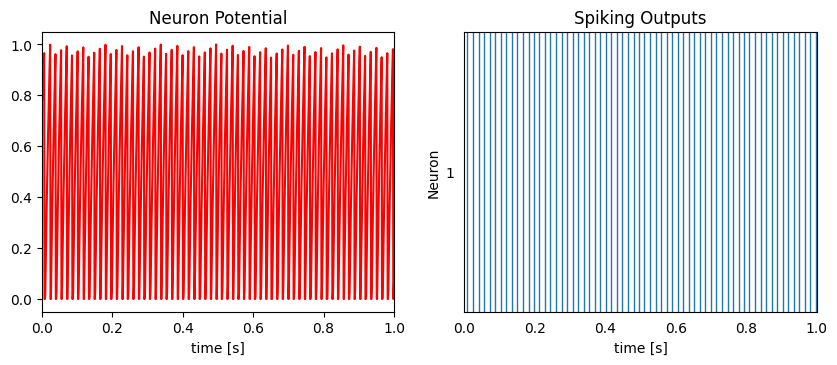

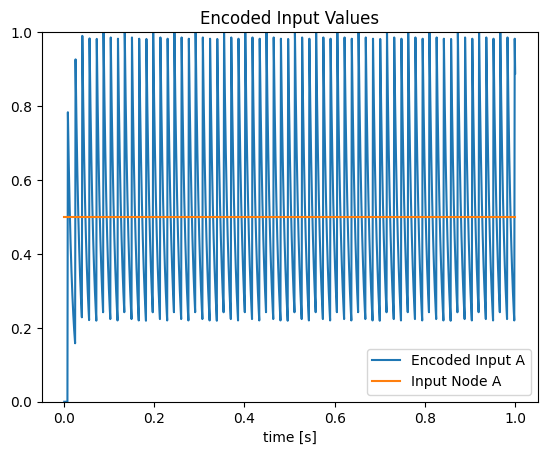

In [3]:
nengo_inp = .5

# Create a model to perform the sorting
model = nengo.Network(label="Representation")
with model:
    # Add input nodes for each value of the array
    input_node = nengo.Node(nengo_inp)

    # Add a single neuron to encode the first value of the input array
    input_neuron = nengo.Ensemble(n_neurons=1, dimensions=1,
        # Set intercept to 0.1
        intercepts=Uniform(0,0),
        # Set the maximum firing rate of the neuron to 100hz
        max_rates=Uniform(100,100),
        # Set the neuron's firing rate to increase for positive input
        encoders=[[1]])

    # Connect the nodes to the encoding neurons
    nengo.Connection(input_node, input_neuron)

    ## Add probes so we can see the outputs at each step
    # This probe captures our constant input value from the array to be sorted
    input_probe_node = nengo.Probe(input_node)

    # This probe shows us how well our neurons can approximate our inputs
    input_probe_neuron = nengo.Probe(input_neuron, synapse=0.01)

    # This probe captures the actual spikes from the neurons
    spikes = nengo.Probe(input_neuron.neurons)

    # These probes show us our neuron potential
    membranePotential = nengo.Probe(input_neuron.neurons, "voltage")


# Build the simulator to run the model containing just input encoding
with nengo.Simulator(model) as sim:
    # Run it for 1 second
    sim.run(1)

# Plot the soma voltages of the neurons
plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.plot(sim.trange(), sim.data[membranePotential][:, 0], "r")
plt.xlim(0, 1)
plt.xlabel("time [s]")
plt.title("Neuron Potential")

# Plot the spiking output of the ensemble
plt.subplot(222)
rasterplot(sim.trange(), sim.data[spikes])
plt.ylabel("Neuron")
plt.xlabel("time [s]")
plt.title("Spiking Outputs")
plt.xlim(0, 1)

# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[input_probe_neuron], label="Encoded Input A")
plt.plot(sim.trange(), sim.data[input_probe_node], label="Input Node A")
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")
plt.title("Encoded Input Values")
plt.show()

## Analysis of one neuron encoding data

We would expect constant spikes evenly spaced (top right plot) as we are sending in a constant value.

We can see that the membrane potential increases (top left plot) and reaches a certain value, a spike is emmitted, and the membrane potential resets.

We can also see that this single neuron cannot perfectly represent our input value (bottom plot). We could fine tune parameters to a specific value to get it to perfectly represent it; however, that's not generalizable. 

Input signals drive neural populations based on each neuron’s "tuning curve".

The tuning curve describes how much a particular neuron will fire as a function of the input signal. In this case, our input signal is a constant value over 1 second. We can plot the tuning curve to better understand our outputs.

Build finished in 0:00:01.                                                      


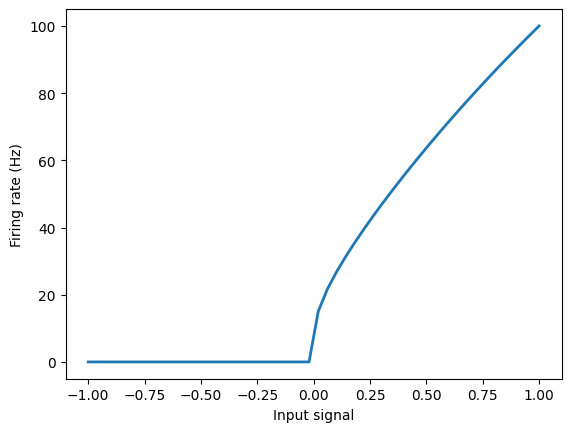

In [4]:
with nengo.Simulator(model) as sim:
    eval_points, activities = tuning_curves(input_neuron, sim)

plt.figure()
plt.plot(eval_points, activities, lw=2)
plt.xlabel("Input signal")
plt.ylabel("Firing rate (Hz)")
hide_input()

**Before we move on, try hand tuning the parameters and see if you can get a single neuron to better represent one of your input values. Possibly then try representing a different value and consider why it doesn't do as well as the first one you tuned (or maybe it does better?). Play with it!**


In [ ]:
with model:
    input = nengo.Node(lambda t: t * 2 - 1)
    input_probe = nengo.Probe(input)

In [ ]:
with nengo.Simulator(model) as sim:
    sim.run(1.0)

plt.figure()
plt.plot(sim.trange(), sim.data[input_probe], lw=2)
plt.title("Input signal")
plt.xlabel("Time (s)")
plt.xlim(0, 1)
hide_input()